## **Data Collection**



**Loading Data**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('car data.csv')

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## **DATA PREPROCESSING**



**Data Cleaning**

In [ ]:
data.duplicated().sum()

2

In [ ]:
data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

**Classified into Categorical and Numerical Columns**

In [ ]:
numerical_columns=[]
categorical_columns=[]
for column in data.columns:
  if data[column].dtype == 'object' or data[column].dtype == 'period[M]' :
    categorical_columns.append(column)
  else:
    numerical_columns.append(column)

print("Numerical Columns:",numerical_columns)
print("categorical Columns :",categorical_columns)

Numerical Columns: ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
categorical Columns : ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Outlier Detection and Removal**

In [ ]:
numerical_columns

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def boxplot(str,column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column} {str}')
    plt.show()

Before Outlier Removing:  Year


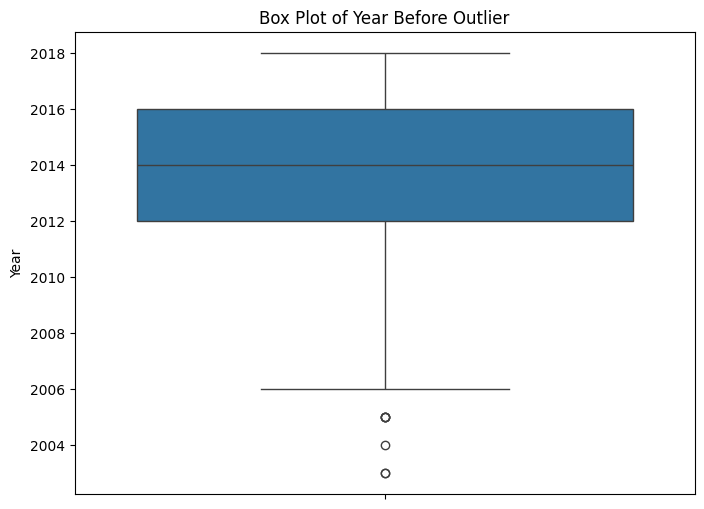

After Outlier Removing:  Year


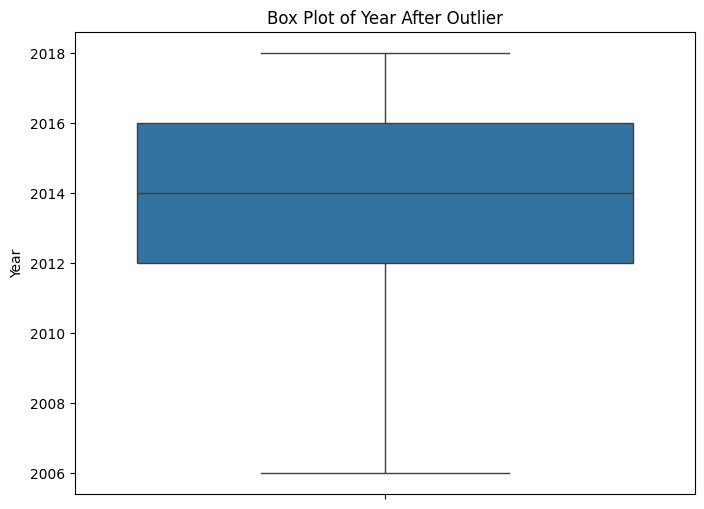

Before Outlier Removing:  Selling_Price


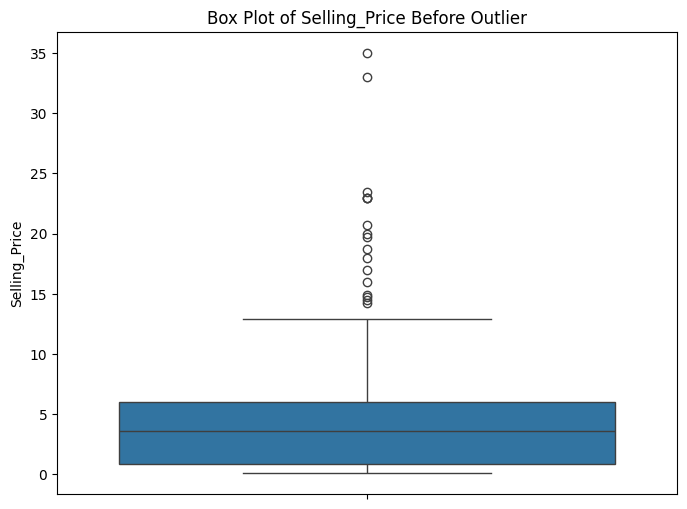

After Outlier Removing:  Selling_Price


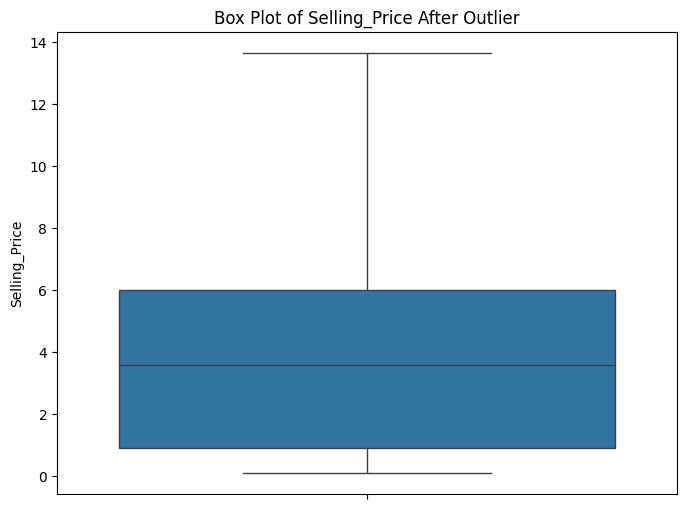

Before Outlier Removing:  Present_Price


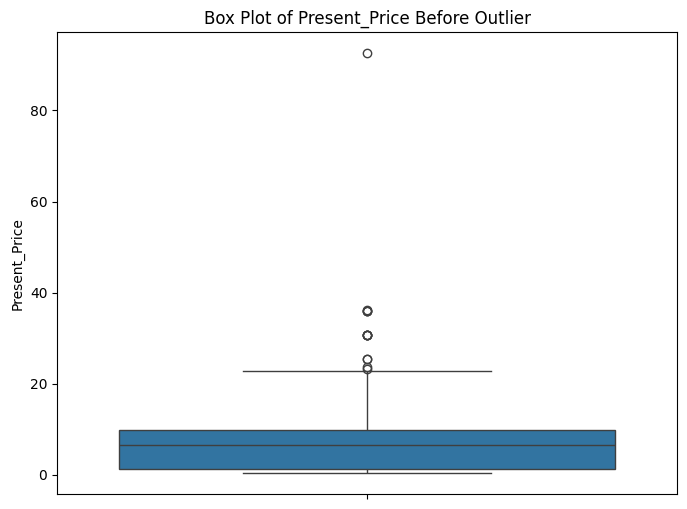

After Outlier Removing:  Present_Price


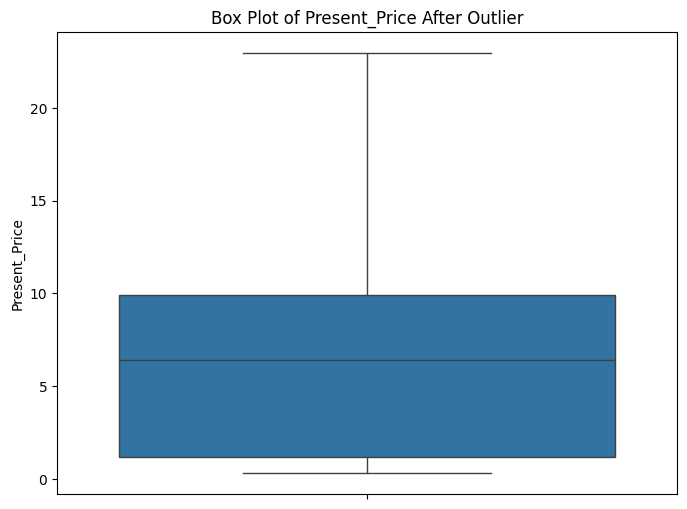

Before Outlier Removing:  Driven_kms


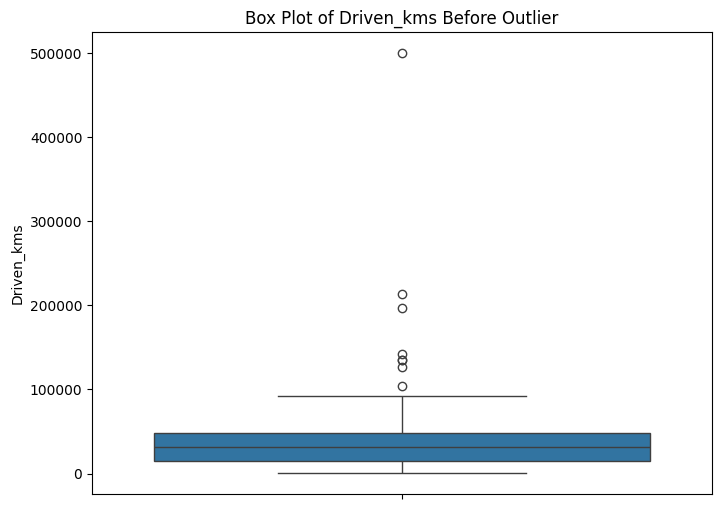

After Outlier Removing:  Driven_kms


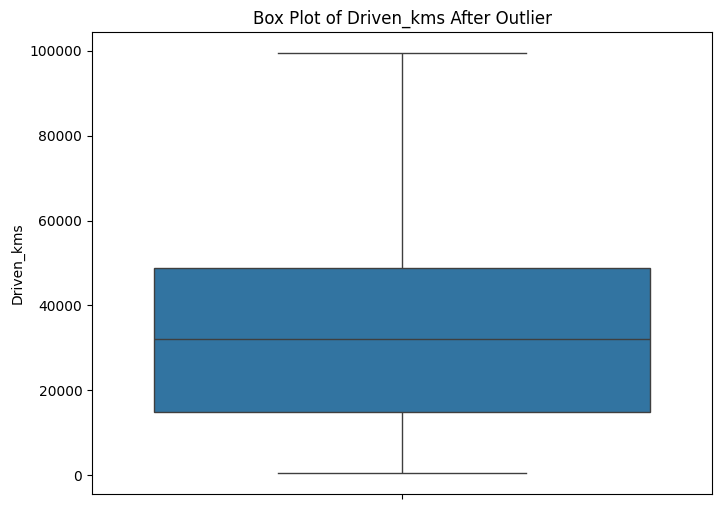

Before Outlier Removing:  Owner


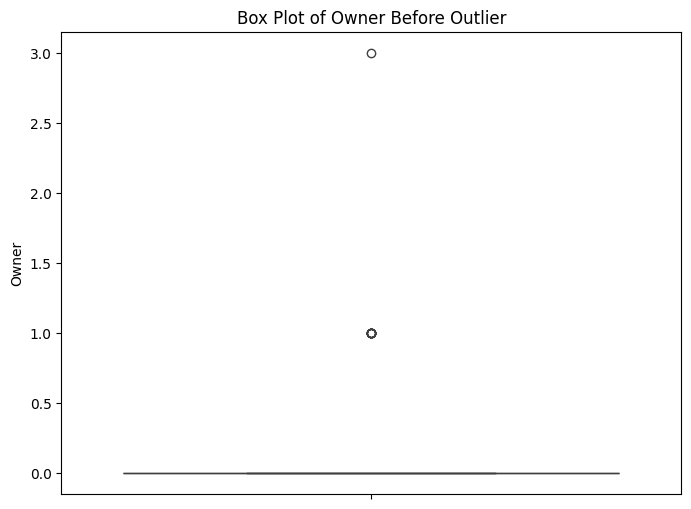

After Outlier Removing:  Owner


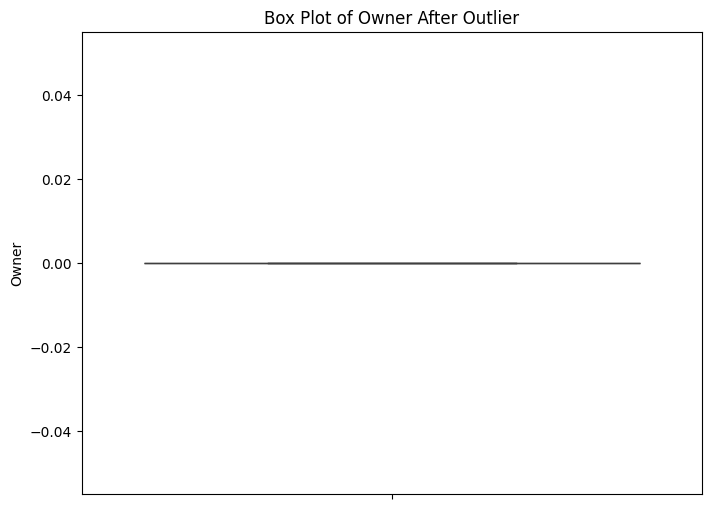

In [ ]:
for column in numerical_columns:

    print("Before Outlier Removing: ",column)

    boxplot('Before Outlier',column)

    print("After Outlier Removing: ",column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data.loc[(data[column] < lower_bound),column] = lower_bound
    data.loc[(data[column] > upper_bound),column] = upper_bound

    boxplot('After Outlier',column)



In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


## **DATA VISUALIZATION**

In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.0
mean,2013.667774,4.272359,7.076578,34426.617940,0.0
std,2.768139,3.749446,6.160352,23726.441467,0.0
min,2006.000000,0.100000,0.320000,500.000000,0.0
25%,2012.000000,0.900000,1.200000,15000.000000,0.0
50%,2014.000000,3.600000,6.400000,32000.000000,0.0
75%,2016.000000,6.000000,9.900000,48767.000000,0.0
max,2018.000000,13.650000,22.950000,99417.500000,0.0


**Distribution of Selling Price**

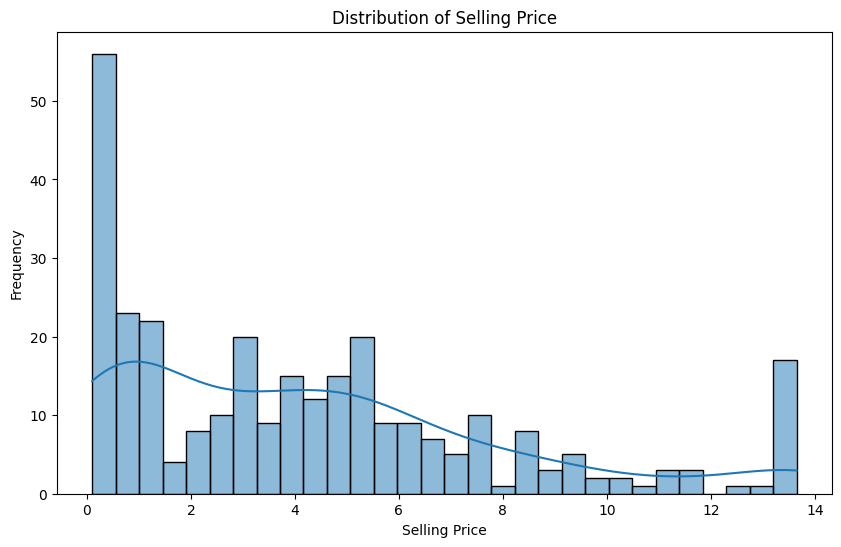

In [ ]:
# Distribution of Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

**Correlation matrix**

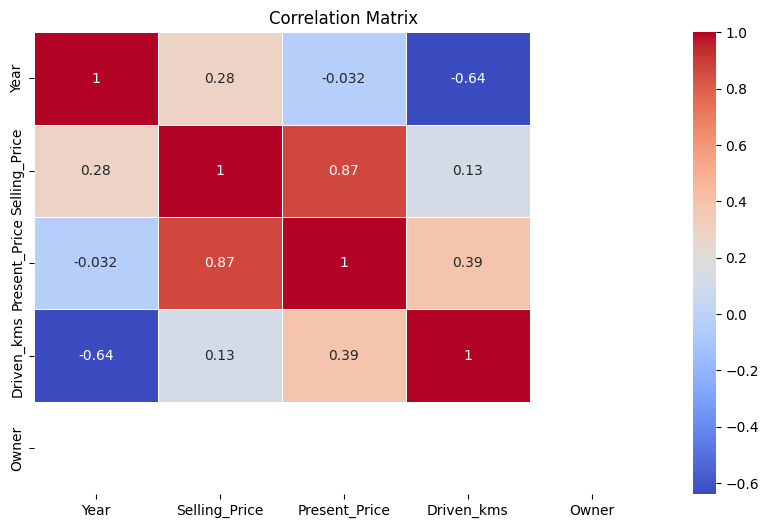

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Distribution of Selling Price by Fuel Type**

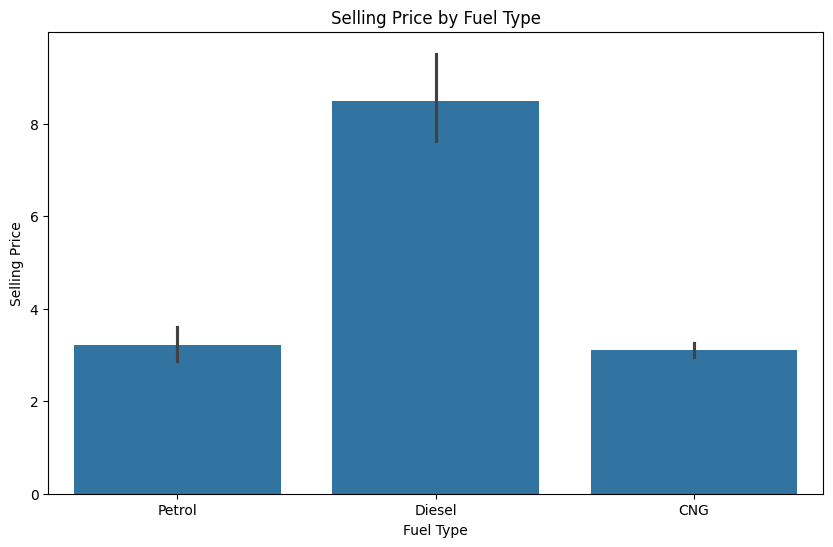

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()


**Distribution of Selling Price by Transmission Type**

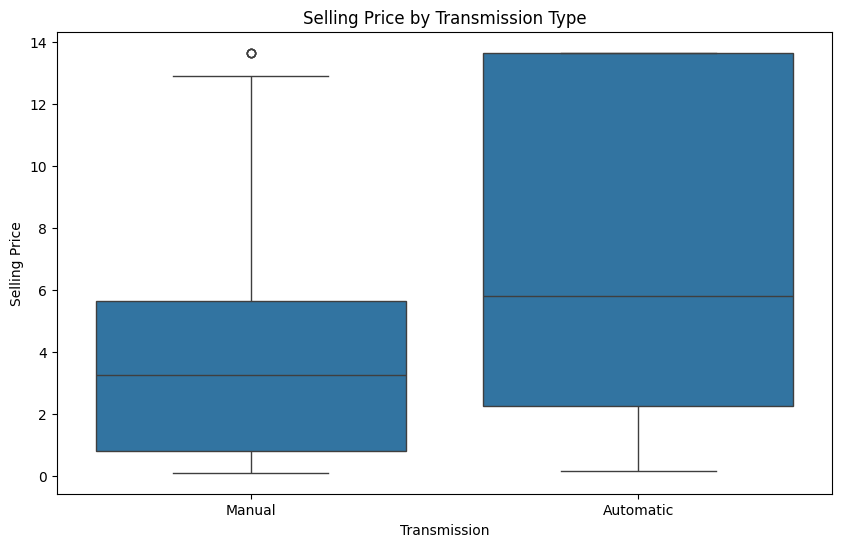

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=data)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

** Scatter plot of Selling Price vs. Present Price**

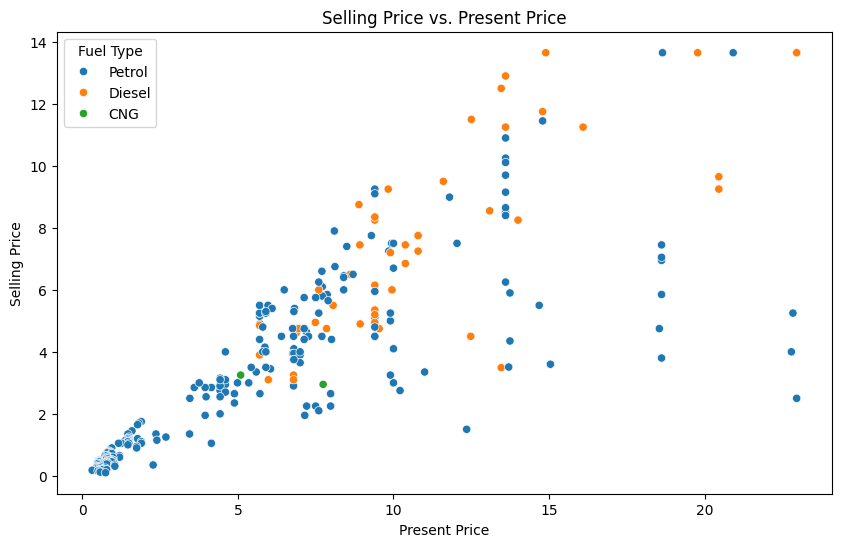

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', hue='Fuel_Type', data=data)
plt.title('Selling Price vs. Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.legend(title='Fuel Type')
plt.show()

## **FEATURE ENGINEERING**

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
label = LabelEncoder()
scalerx = StandardScaler()
scalery = StandardScaler()

**LabelEncoder**

In [ ]:
encoding_mapping = {}
for column in categorical_columns:
  print(column)
  data[column] = label.fit_transform(data[column])
  encoding_mapping[column] = dict(zip(label.classes_, label.transform(label.classes_)))

Car_Name
Fuel_Type
Selling_type
Transmission


In [ ]:
encoding_mapping

{'Car_Name': {'800': 0,
  'Activa 3g': 1,
  'Activa 4g': 2,
  'Bajaj  ct 100': 3,
  'Bajaj Avenger 150': 4,
  'Bajaj Avenger 150 street': 5,
  'Bajaj Avenger 220': 6,
  'Bajaj Avenger 220 dtsi': 7,
  'Bajaj Avenger Street 220': 8,
  'Bajaj Discover 100': 9,
  'Bajaj Discover 125': 10,
  'Bajaj Dominar 400': 11,
  'Bajaj Pulsar  NS 200': 12,
  'Bajaj Pulsar 135 LS': 13,
  'Bajaj Pulsar 150': 14,
  'Bajaj Pulsar 220 F': 15,
  'Bajaj Pulsar NS 200': 16,
  'Bajaj Pulsar RS200': 17,
  'Hero  CBZ Xtreme': 18,
  'Hero  Ignitor Disc': 19,
  'Hero Extreme': 20,
  'Hero Glamour': 21,
  'Hero Honda CBZ extreme': 22,
  'Hero Honda Passion Pro': 23,
  'Hero Hunk': 24,
  'Hero Passion Pro': 25,
  'Hero Passion X pro': 26,
  'Hero Splender Plus': 27,
  'Hero Splender iSmart': 28,
  'Hero Super Splendor': 29,
  'Honda Activa 125': 30,
  'Honda Activa 4G': 31,
  'Honda CB Hornet 160R': 32,
  'Honda CB Shine': 33,
  'Honda CB Trigger': 34,
  'Honda CB Unicorn': 35,
  'Honda CB twister': 36,
  'Honda CBR

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000.0,2,0,1,0
1,93,2013,4.75,9.54,43000.0,1,0,1,0
2,68,2017,7.25,9.85,6900.0,2,0,1,0
3,96,2011,2.85,4.15,5200.0,2,0,1,0
4,92,2014,4.60,6.87,42450.0,1,0,1,0


### **MODEL SELECTION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,precision_recall_curve, roc_curve, roc_auc_score,auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Prepare the data for modeling
X = data.drop(['Selling_Price', 'Car_Name'], axis=1)
y = data['Selling_Price']

**Standard Scaler**

In [ ]:
X = scalerx.fit_transform(X)

In [ ]:

# Convert the y to a NumPy array
y_array = y.values

# Reshape the NumPy array to a 2D array with one column
y_reshaped = y_array.reshape(-1, 1)

# Use the reshaped array for fitting and transforming
y = scalery.fit_transform(y_reshaped)


In [ ]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000.0,2,0,1,0
1,93,2013,4.75,9.54,43000.0,1,0,1,0
2,68,2017,7.25,9.85,6900.0,2,0,1,0
3,96,2011,2.85,4.15,5200.0,2,0,1,0
4,92,2014,4.60,6.87,42450.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988.0,1,0,1,0
297,66,2015,4.00,5.90,60000.0,2,0,1,0
298,69,2009,3.35,11.00,87934.0,2,0,1,0
299,69,2017,11.50,12.50,9000.0,1,0,1,0


In [ ]:
X

array([[ 0.12021767, -0.24171569, -0.31353144, ..., -0.73728539,
         0.39148015,  0.        ],
       [-0.24163751,  0.40054925,  0.36194467, ..., -0.73728539,
         0.39148015,  0.        ],
       [ 1.20578319,  0.45095486, -1.16209831, ..., -0.73728539,
         0.39148015,  0.        ],
       ...,
       [-1.68905821,  0.63794338,  2.25893491, ..., -0.73728539,
         0.39148015,  0.        ],
       [ 1.20578319,  0.88184146, -1.07344207, ..., -0.73728539,
         0.39148015,  0.        ],
       [ 0.84392802, -0.19131009, -1.22272229, ..., -0.73728539,
         0.39148015,  0.        ]])

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression**

In [ ]:
# Initialize the models
linear_model = LinearRegression()

# Train the models
linear_model.fit(X_train, y_train)

# Make predictions
y_linear_pred = linear_model.predict(X_test)


In [ ]:
y_linear_pred

array([[-0.82001338],
       [ 1.16186576],
       [ 0.40512461],
       [-1.26336017],
       [ 1.48481769],
       [ 0.63676944],
       [-0.80063081],
       [-0.89800297],
       [-0.80404263],
       [ 0.6837663 ],
       [ 1.12382429],
       [-0.98136325],
       [ 0.79977422],
       [-0.6749196 ],
       [ 0.53296449],
       [-0.38721542],
       [-0.95369158],
       [ 1.90657783],
       [-0.70748511],
       [-0.51683062],
       [-1.00959137],
       [ 0.8531569 ],
       [ 0.49531556],
       [-0.38696482],
       [-0.93903069],
       [-0.12176756],
       [ 0.29270525],
       [-0.36786624],
       [-0.59382974],
       [-0.69168241],
       [-1.01518039],
       [ 1.15412007],
       [-1.26661739],
       [-0.4655367 ],
       [ 0.95792606],
       [ 0.06358487],
       [ 0.86721254],
       [ 1.09728745],
       [-0.42497478],
       [ 1.20620824],
       [ 0.17670154],
       [-0.06650443],
       [ 0.03735056],
       [-1.01793801],
       [ 0.62540264],
       [-1

In [ ]:
# Evaluate the models
mse_lr = mean_squared_error(y_test, y_linear_pred)

r2_lr = r2_score(y_test, y_linear_pred)

# Display the results
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 0.14727675497790657, R2: 0.8424836838323869


**Residual Plot**

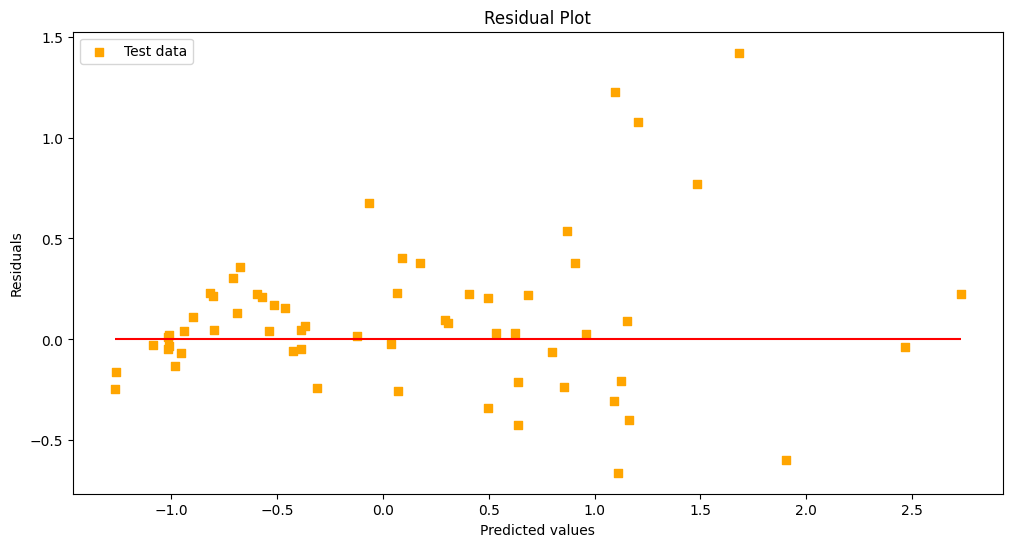

In [ ]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_linear_pred, y_linear_pred - y_test, c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_linear_pred.min(), xmax=y_linear_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

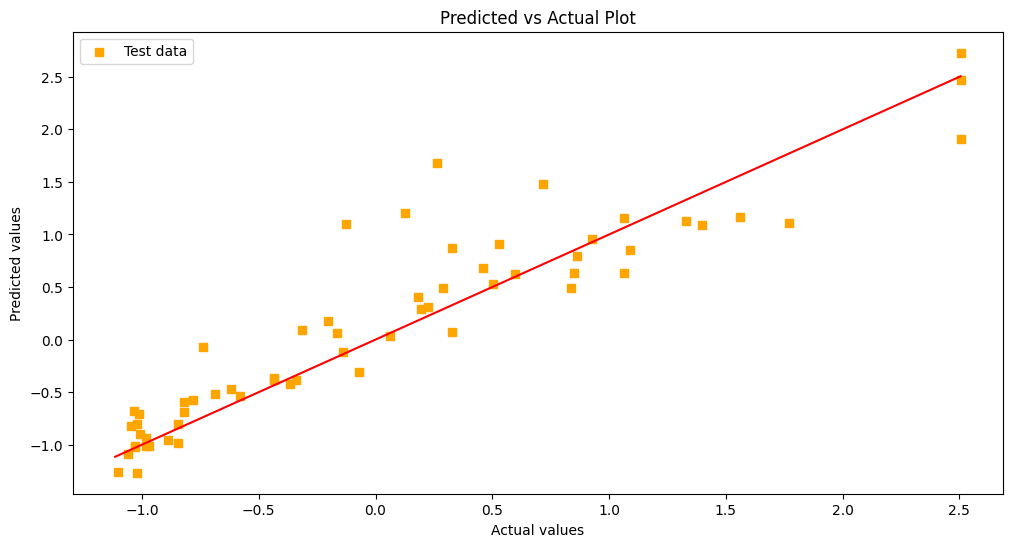

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_linear_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Decision Tree Regressor**

In [ ]:
decision_model = DecisionTreeRegressor()

decision_model.fit(X_train, y_train)

y_decision_pred = decision_model.predict(X_test)

In [ ]:
y_decision_pred

array([-1.00778634,  1.44999533,  0.24781951, -1.0879314 ,  0.74204735,
        0.44818215, -0.84482473, -1.00778634, -1.00778634,  0.78211988,
        0.79547739, -0.8074237 ,  0.06081439, -1.02114385,  0.44818215,
       -0.5135585 , -0.8074237 ,  1.44999533, -1.01312934, -0.70056363,
       -1.07457389,  1.19620266,  0.12760193, -0.33991089, -1.02114385,
       -0.3666259 ,  0.26117702, -0.31319587, -0.83413872, -0.84482473,
       -1.07457389,  1.86407812, -1.02114385, -0.54027352,  0.92905248,
        0.12760193,  0.84890742, -0.17962078, -0.46012847,  0.43482464,
       -0.17962078, -0.24640832,  0.27453453, -0.98107132,  0.6619023 ,
       -0.96771381,  1.12941511,  2.50523855, -0.31319587, -0.3666259 ,
        0.06081439, -0.75399367,  2.50523855,  2.50523855,  0.44818215,
        1.30306273,  0.26117702,  0.92905248, -0.43341345,  0.56839973,
       -1.0879314 ])

In [ ]:
y_decision_pred= y_decision_pred.reshape(-1,1)

In [ ]:
mse_dt = mean_squared_error(y_test, y_decision_pred)

r2_dt = r2_score(y_test, y_decision_pred)


print(f'Decision Tree - MSE: {mse_dt}, R2: {r2_dt}')

Decision Tree - MSE: 0.16840538482558762, R2: 0.8198860652212554


**Residual PLot**

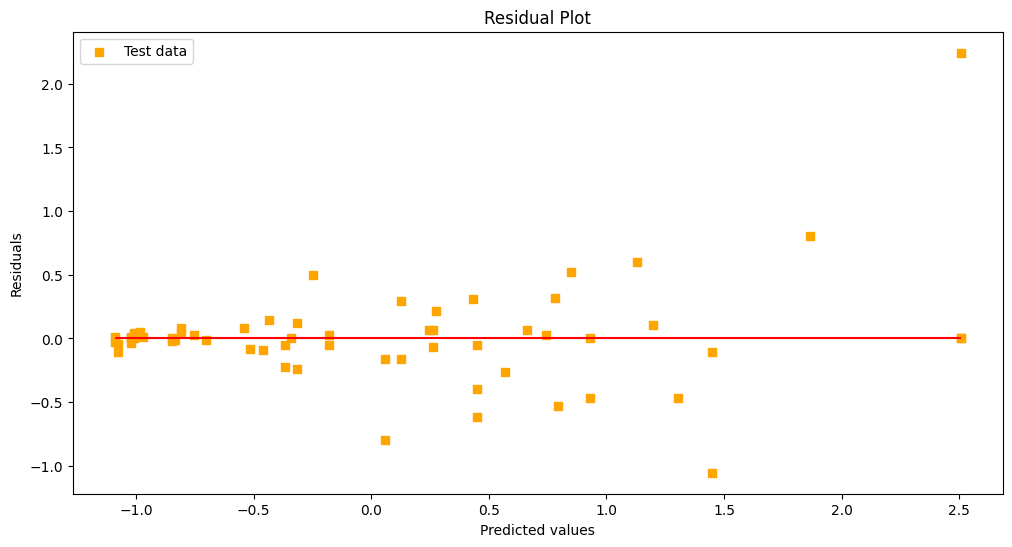

In [ ]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_decision_pred,(y_decision_pred - y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_decision_pred.min(), xmax=y_decision_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

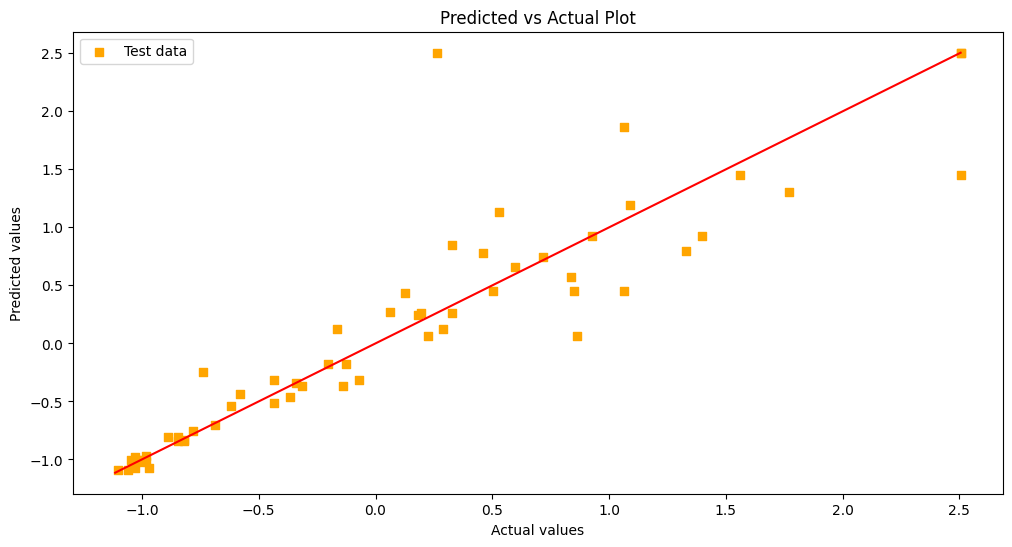

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_decision_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Random Forest Regressor**

In [ ]:
random_model = RandomForestRegressor()

random_model.fit(X_train, y_train)

y_random_pred = random_model.predict(X_test)

<ipython-input-84-bf93474fa3dc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model.fit(X_train, y_train)


In [ ]:
y_random_pred

array([-1.02218574,  1.71914914,  0.17221601, -1.08528661,  0.85318183,
        0.55597725, -0.86355196, -0.98502515, -1.01556041,  0.63879381,
        0.97377342, -0.854549  ,  1.03845048, -1.01849906,  0.27707246,
       -0.43942433, -0.83331056,  1.89549498, -1.01475896, -0.7227371 ,
       -1.04545452,  0.98713093,  0.12626618, -0.38091844, -1.0048744 ,
       -0.22543703,  0.26905795, -0.31813815, -0.81487719, -0.82900944,
       -1.0251511 ,  1.54416577, -1.02111713, -0.41444579,  0.90754689,
       -0.02654372,  0.71479803,  0.16323977, -0.4294062 ,  0.44187741,
       -0.08042791, -0.2056412 ,  0.1835699 , -0.99143675,  0.53660886,
       -0.93327816,  1.05741814,  1.16708329, -0.37143461, -0.21127807,
        0.22618035, -0.72981658,  2.49348394,  2.50523855,  0.55290502,
        1.49041516,  0.23205765,  1.28494995, -0.40616413,  0.66444022,
       -1.0778064 ])

In [ ]:
y_random_pred = y_random_pred.reshape(-1,1)

In [ ]:
mse_rf = mean_squared_error(y_test, y_random_pred)

r2_rf = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')

Random Forest - MSE: 0.055632340503269644, R2: 0.9404997663265198


**Residual Plot**

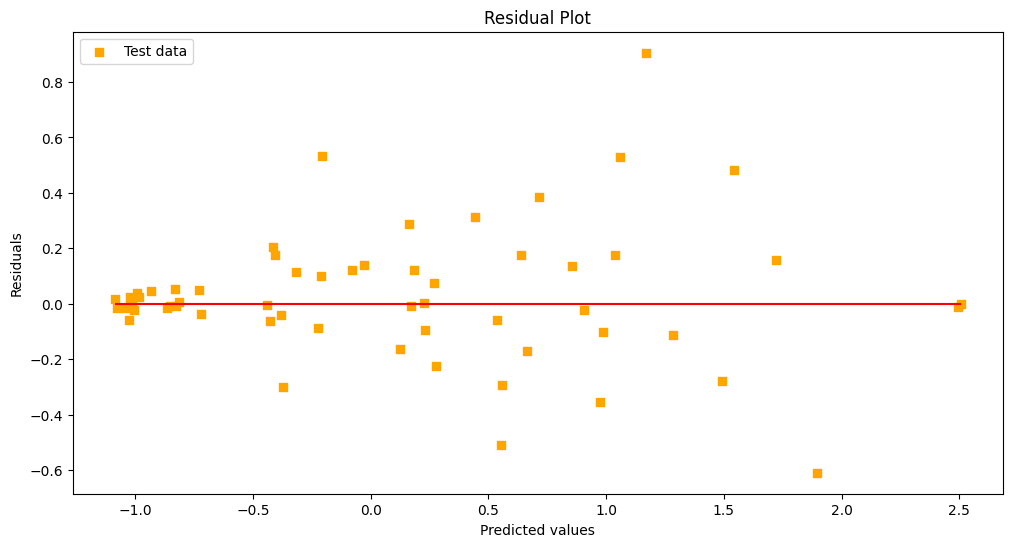

In [ ]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_random_pred,(y_random_pred - y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_random_pred.min(), xmax=y_random_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

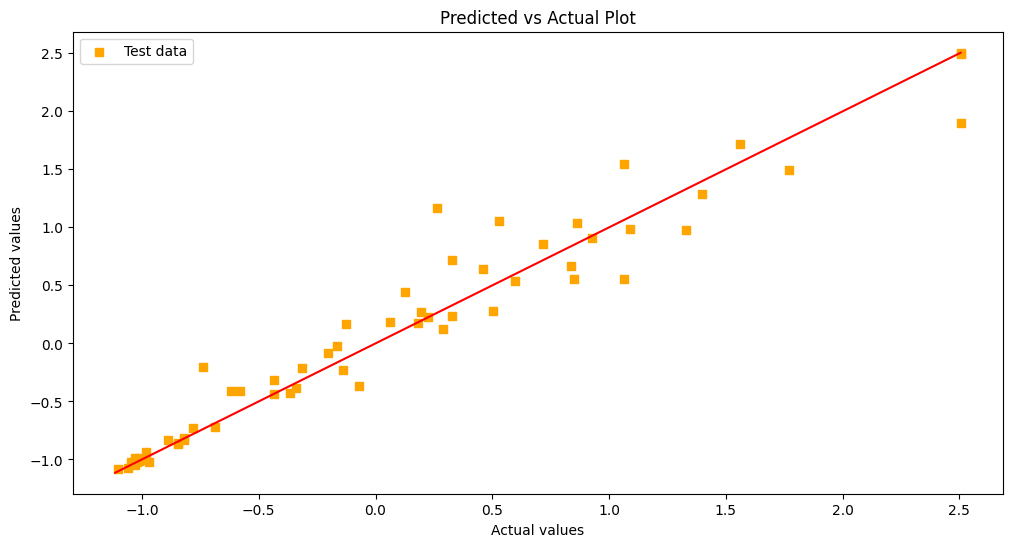

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_random_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Support Vector Regression (SVR)**

In [ ]:
svr = SVR(kernel='linear')

svr.fit(X_train, y_train)

y_svr_pred = svr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_svr_pred

array([-7.88343413e-01,  1.15620611e+00,  3.47041281e-01, -1.21595062e+00,
        1.63431568e+00,  4.88115927e-01, -8.40359291e-01, -9.42347930e-01,
       -8.89530009e-01,  5.71751432e-01,  8.75738767e-01, -9.69605995e-01,
        9.30238661e-01, -6.90734306e-01,  4.36529187e-01, -3.68619182e-01,
       -9.40382182e-01,  1.93447981e+00, -8.20798601e-01, -6.23316776e-01,
       -1.02937045e+00,  6.62973971e-01,  4.06884857e-01, -3.72234670e-01,
       -9.63470954e-01, -9.17936210e-02,  3.60337032e-01, -3.19636900e-01,
       -6.93815506e-01, -7.61742711e-01, -1.02991811e+00,  1.10842169e+00,
       -1.20170357e+00, -3.18582805e-01,  8.09568818e-01,  5.21634764e-02,
        1.00659531e+00,  1.35852736e+00, -4.20290281e-01,  1.43158041e+00,
        4.61439498e-01,  3.35326993e-01,  1.48523960e-03, -1.02580897e+00,
        4.63383685e-01, -1.00581644e+00,  9.79076763e-01,  2.09495834e+00,
       -3.35171324e-01, -6.88197649e-03,  4.52151285e-01, -6.78896774e-01,
        2.59059602e+00,  

In [ ]:
y_svr_pred = y_svr_pred.reshape(-1,1)

In [ ]:
mse_svr = mean_squared_error(y_test, y_svr_pred)

r2_svr = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_svr}, R2: {r2_svr}')

Random Forest - MSE: 0.21902552157093202, R2: 0.9404997663265198


**Residual Plot**

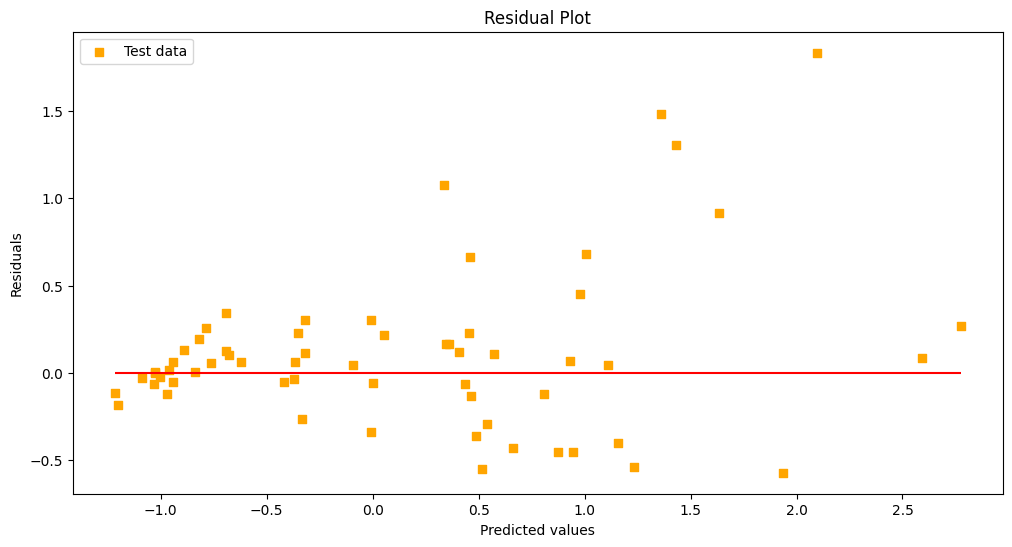

In [ ]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_svr_pred,(y_svr_pred - y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_svr_pred.min(), xmax=y_svr_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

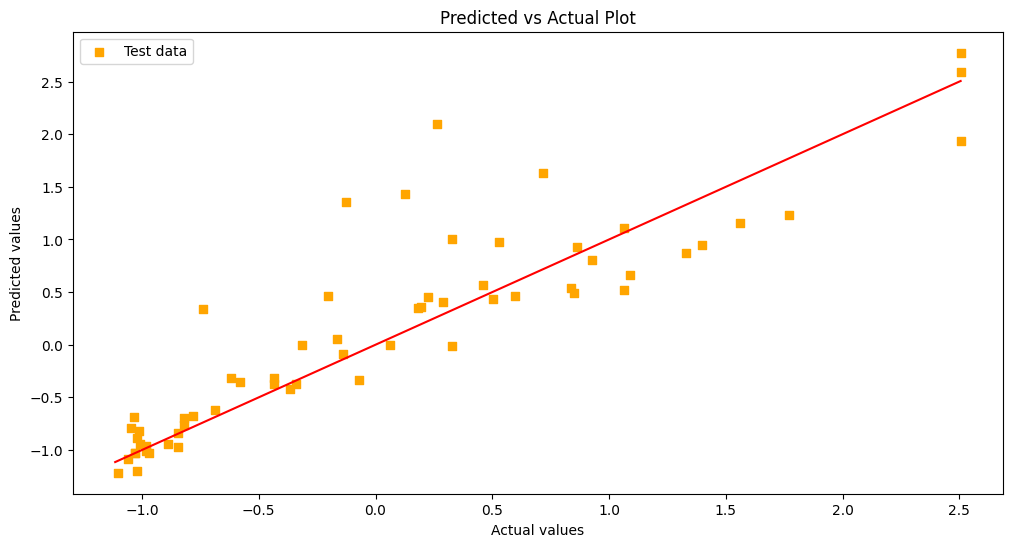

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_svr_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Comaprison of Models**

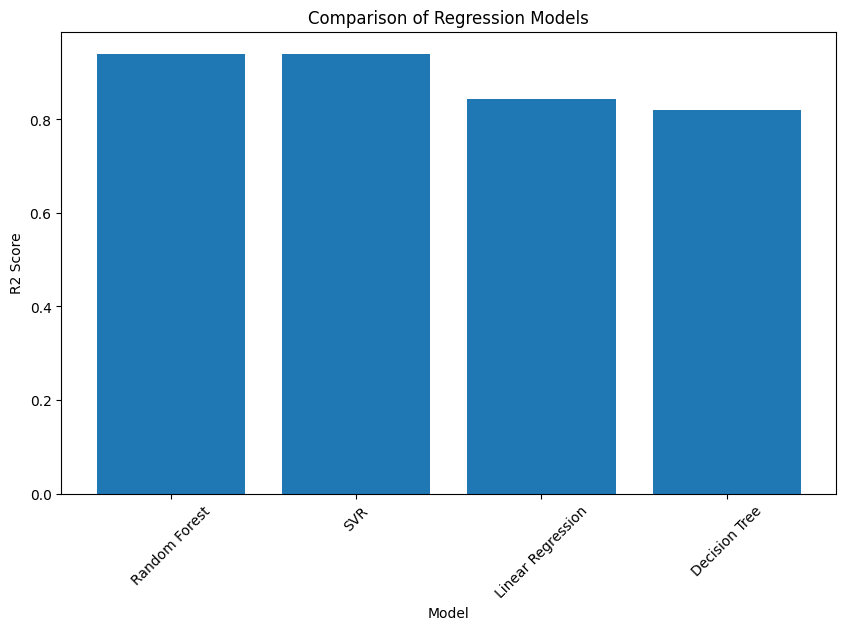

In [ ]:

# Create a dictionary to store model names and their MSE values
models_r2 = {
    "Linear Regression": r2_lr,
    "Decision Tree": r2_dt,
    "Random Forest": r2_rf,
    "SVR": r2_svr


}

# Sort models by descending order of accuracy
sorted_models_r2 = dict(sorted(models_r2.items(), key=lambda item: item[1],reverse = True))

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(sorted_models_r2.keys(), sorted_models_r2.values())
plt.title('Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()
